$n_0$ = 12 - параметр выбран из результатов одномерного моделирования

Эффективность получется максимальной для остро сфокусированных импульсов

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess
import struct
from math import floor
import gzip
from scipy.interpolate import griddata
import cmath

In [25]:
# Set the font family and size to use for Matplotlib figures.
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 25

In [73]:
l = subprocess.check_output(['ls',], cwd = r"./data/2D_angle/")
path_ends = l.split()
path_ends = sorted([i.decode('ascii') for i in path_ends[:]])
print(path_ends[:])

['real_n_12.000_r_1.002.dat', 'real_n_12.000_r_1.005.dat', 'real_n_12.000_r_1.053.dat', 'real_n_12.000_r_1.175.dat', 'real_n_12.000_r_1.501.dat', 'real_n_12.000_r_1.677.dat', 'real_n_12.000_r_1.847.dat', 'real_n_12.000_r_10.02.dat', 'real_n_12.000_r_10.37.dat', 'real_n_12.000_r_12.43.dat', 'real_n_12.000_r_12.70.dat', 'real_n_12.000_r_12.93.dat', 'real_n_12.000_r_13.73.dat', 'real_n_12.000_r_2.032.dat', 'real_n_12.000_r_2.077.dat', 'real_n_12.000_r_2.100.dat', 'real_n_12.000_r_2.271.dat', 'real_n_12.000_r_2.323.dat', 'real_n_12.000_r_2.367.dat', 'real_n_12.000_r_2.439.dat', 'real_n_12.000_r_2.674.dat', 'real_n_12.000_r_2.685.dat', 'real_n_12.000_r_2.69.dat', 'real_n_12.000_r_2.905.dat', 'real_n_12.000_r_3.079.dat', 'real_n_12.000_r_3.16.dat', 'real_n_12.000_r_3.47.dat', 'real_n_12.000_r_3.64.dat', 'real_n_12.000_r_3.94.dat', 'real_n_12.000_r_4.060.dat', 'real_n_12.000_r_5.08.dat', 'real_n_12.000_r_5.185.dat', 'real_n_12.000_r_5.45.dat', 'real_n_12.000_r_5.49.dat', 'real_n_12.000_r_5.78

In [74]:
energy_i = 2.5622204791084654e+35 # for r = ?
energy_i = 9.108179963802992e+35 # for r = 1.847 /mu m time_steps = 524

In [76]:
9.10/2.56*1.847

6.5655078125

In [77]:
9.108179963802992e+35*(1.847)**1

1.6822808393144127e+36

In [78]:
6.90842042793818e+35*(2.032)**1 # for r = 2.032 /mu m time_steps = 524

1.403791030957038e+36

In [79]:
omega_amp, lambda_w_amp, rcs_amp = read_file(3001, r"./data/2D_angle/" + path_ends[15])

In [80]:
rcs_amp.shape

(524, 3001)

In [81]:
def read_file(dim2, name_of_file):
    #print(name_of_file)
    with open(name_of_file, "r") as file:
        line = file.read()
        data = line.split("    ")
        dim1 = int((len(data)-1)/(3003))
        omega = np.zeros(dim1)
        lambda_w = np.zeros(dim1)
        rcs = np.zeros((dim1,dim2))
        for i in range(dim1):
            omega[i] = float(data[0+i*(dim2+2)])
            #print(i)
            lambda_w[i] = float(data[1+i*(dim2+2)])
            rcs[i,:] = data[2+i*(dim2+2):(i+1)*(dim2+2)]
    return omega, lambda_w, rcs

In [82]:
energy_n_1 = []
r_array = []
for i in sorted(path_ends[:]):
    omega_amp, lambda_w_amp, rcs_amp = read_file(3001, r"./data/2D_angle/" + i)
    filter_lambda = np.where(lambda_w_amp>3) # 3 microns
    #print(i)
    #print("energy    = " + str((np.sum(rcs_amp[filter_lambda ,:750]) + np.sum(rcs_amp[filter_lambda ,2250:]))/energy_i))
    r_array.append(float(i[16:-4]))
    energy_n_1.append((np.sum(rcs_amp[filter_lambda ,:750]) + np.sum(rcs_amp[filter_lambda ,2250:]))/energy_i/r_array[-1]*1.847/524*rcs_amp.shape[0])
energy_n_1 = np.array(energy_n_1)
r_array = np.array(r_array)

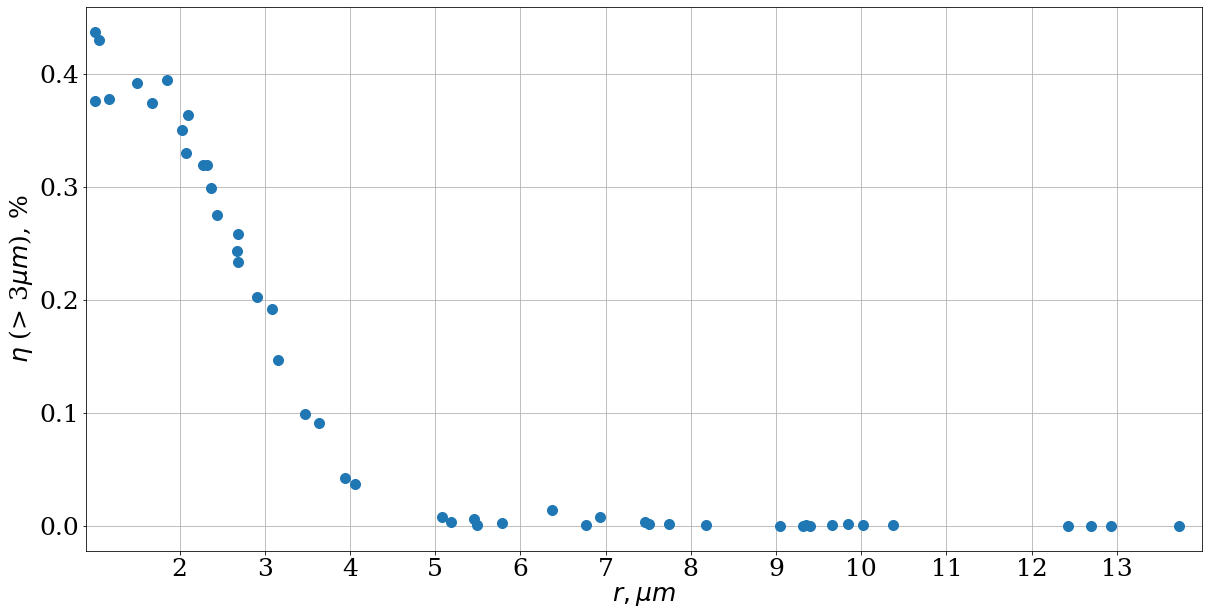

In [83]:
fig = plt.figure(figsize=(20,10))
plt.plot(r_array,energy_n_1*100, linestyle = "none", marker = ".", markersize = 20)
plt.xlabel(r"$r, \mu m$")
plt.ylabel(r"$\eta$ (> 3$\mu m$), %")
plt.xticks((np.arange(2,14,1)))
#plt.yticks(np.arange(0,limit, 0.2))
#plt.ylim(1e-3, limit)
plt.xlim(0.9, 14)
plt.grid()
plt.show()